<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/KT_giuaki/Hand_palm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
from numpy.lib.npyio import load
import numpy as np

In [24]:
#Load data từ drive lên 
folder = '/content/drive/MyDrive/Colab Notebooks/Hand_palm/Image/'
#Tạo 2 danh sách trống để chứa ảnh và nhãn cần xử lí 
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Truong'):
    output = 0.0  
  if file.startswith('Quang'):
    output = 1.0 
  if file.startswith('Hung'):
    output = 2.0  
  if file.startswith('cuong'):
    output = 3.0  
  if file.startswith('Danh'):
    output = 4.0  
  photo = load_img (folder+file, target_size= (124,124))
  photo = img_to_array (photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
# Lưu file hình và file nhãn vào drive để sau này xử lí  
save('/content/drive/MyDrive/Colab Notebooks/Hand_palm/Hand_palm_photo.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Hand_palm/Hand_palm_label.npy', labels)


In [25]:
#Tải ảnh và nhãn đã lưu lên để xử lí
photo = np.load('/content/drive/MyDrive/Colab Notebooks/Hand_palm/Hand_palm_photo.npy')
label = np.load('/content/drive/MyDrive/Colab Notebooks/Hand_palm/Hand_palm_label.npy')

In [26]:
#Chia dữ liệu thành 2 phần train và test để kiểm tra mô hình 
split_sample = int(0.1*len(photo))    # phần train : 90% , test: 10%
(x_train,y_train) = photo[split_sample:],label[split_sample:]
(x_test,y_test)= photo[:split_sample],label[:split_sample]

In [27]:
#Kiểm tra kích thước của tập train
x_train.shape

(327, 124, 124, 3)

In [28]:
#Kiểm tra kích thước của tập test
x_test.shape

(36, 124, 124, 3)

In [29]:
#Đưa ảnh về độ phân giải 32x32 để đảm bảo độ chính xác 
# và giảm thiểu thời gian tính toán
x_train = x_train.reshape(327,124,124,3)
x_test = x_test.reshape(36,124,124,3)
#Chia 255 để chuẩn hóa dữ liệu về khoảng 0 đến 1 giúp 
# mô hình học được nhanh và hiệu quả hơn
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [30]:
# chuyển đổi các nhãn lớp của dữ liệu huấn luyện và 
# kiểm tra thành các vectơ one-hot encoding.
from keras.utils import to_categorical
y_train = to_categorical(y_train,5)
y_test  = to_categorical(y_test,5)

In [31]:
# Khai báo các thư viện cần thiết để xây dựng mô hình CNN
from keras.models import Sequential , Model
from keras.layers import Dense , Flatten, Dropout, Conv2D, MaxPooling2D ,Normalization,Input
from keras.optimizers import Adam 

In [32]:
# Định nghĩa các biến 
batch_size = 20  # số lượng học
epochs =  20      #số lần học
classes = 5      # Số lớp

In [33]:
model=Sequential()  # Khởi tạo đối tượng để xây dựng mô hình CNN 
# Dùng mô hình CNN với 3 lớp tích chập để huấn luyện cho tập dữ liệu 
model.add(Conv2D(32,kernel_size=(3,3),activation ='linear',input_shape= (124,124,3),padding= 'same'))
# 32:số lần tích chập, (3,3): kích thước bộ lọc , hàm kích hoạt là hàm tuyến tính 
# với đầu vào ảnh là 32x32 pixel và 3 kênh màu
from keras.layers import LeakyReLU
# Sử dụng hàm kích hoạt LeakyReLU cho đầu ra của lớp Conv2D.
model.add(LeakyReLU(alpha= 0.1))
#Lọc giá trị lớn hơn với kích thước 2x2 
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(1024,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(2048,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

from keras.backend import categorical_crossentropy
from keras.losses import categorical_crossentropy
model.add(Flatten())  #chuyển đổi đầu ra của các lớp tích chập 
                      #và lớp pooling thành một vector 1D
model.add(Dense(1024, activation= 'linear'))   #Đi qua 1024 lớp
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(512, activation= 'linear'))    #Đi qua 512 lớp
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(128,activation='linear'))      #Đi qua 128 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 124, 124, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 1024)      295936    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 62, 62, 1024)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 1024)     0         
 2D)                                                  

In [34]:
model.compile(loss= categorical_crossentropy,optimizer= Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,verbose =1)      
# verbose=1,Hiển thị giá trị train, chỉ xuất hiện 1 lần rồi biến mất

Epoch 1/20
17/17 [==============================] - 22s 644ms/step - loss: 20.1723 - accuracy: 0.2569
Epoch 2/20
17/17 [==============================] - 7s 390ms/step - loss: 2.8809 - accuracy: 0.2294
Epoch 3/20
17/17 [==============================] - 7s 390ms/step - loss: 1.6492 - accuracy: 0.4557
Epoch 4/20
17/17 [==============================] - 7s 395ms/step - loss: 0.9047 - accuracy: 0.6667
Epoch 5/20
17/17 [==============================] - 7s 397ms/step - loss: 0.5152 - accuracy: 0.8226
Epoch 6/20
17/17 [==============================] - 7s 398ms/step - loss: 0.4079 - accuracy: 0.8777
Epoch 7/20
17/17 [==============================] - 7s 404ms/step - loss: 0.1524 - accuracy: 0.9541
Epoch 8/20
17/17 [==============================] - 7s 403ms/step - loss: 0.0953 - accuracy: 0.9633
Epoch 9/20
17/17 [==============================] - 7s 408ms/step - loss: 0.1107 - accuracy: 0.9511
Epoch 10/20
17/17 [==============================] - 7s 408ms/step - loss: 0.0404 - accuracy: 0.99

In [35]:
#Lưu mô hình vừa được huấn luyện xuống drive
model.save('/content/drive/MyDrive/Colab Notebooks/Hand_palm/Model_hand_palm.h5')


Test loss: 0.10786115378141403
Test accuracy; 0.9444444179534912


Text(0.5, 1.0, 'Test loss & Test Accuracy')

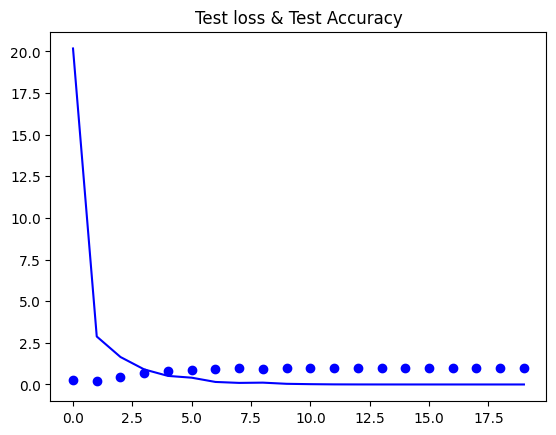

In [36]:
# Vẽ đồ thị độ chính xác và  của tập test
import matplotlib.pyplot as plt
eval = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', eval[0])
print('Test accuracy;',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Test loss')
plt.plot(epochs,val_accuracy,'b',label= 'Test Accuracy')
plt.title('Test loss & Test Accuracy')

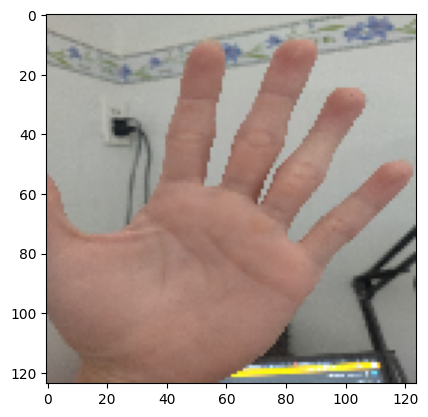

1/1 [==============================] - 1s 512ms/step
[3]
-Chuyện tình cảm: bạn là người yêu thích tự do, sống thoải mái, thích đi du lịch và khám phá mọi thứ xung quanh.
Bạn tập trung nhiều hơn vào công việc vì vậy ít khi dành thời gian cho chuyện tình cảm cá nhân.
- Bạn là người có nhiều tài lẻ về lĩnh vực nghệ thuật. Khi làm việc, họ rất tập trung, khả năng giao tiếp khéo léo.
- Sức khỏe : Bạn có một sức khỏe tốt, cả đời không lo đau ốm bệnh tật, lúc nào cũng tươi vui, tràn đầy năng lượng sống.
- Sự nghiệp: bạn là người thông minh, tài giỏi, tự thân lập nghiệp từ hai bàn tay trắng.
 Càng trưởng thành, càng sung sướng, giàu sang, được mọi người ngưỡng mộ.


In [38]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
# Tải một ảnh chưa train qua để kiểm tra độ chính xác của mô hình
img = load_img('/content/drive/MyDrive/Colab Notebooks/Hand_palm/Test_image/cuong (2).jpg',target_size=(124,124))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,124,124,3)
img = img.astype('float32')
img = img /255
Future=np.argmax(model.predict(img),axis=-1)
print(Future)
if (Future == 0):
  print('- Chuyện tình cảm :bạn là những người thẳng thắn, thật thà và được nhiều người yêu quý.')
  print('  Sau khi kết hôn, bạn sẽ may mắn được hưởng cuộc sống hạnh phúc,hòa hợp.')
  print('- Bạn là một người có chí tiến thủ, suy nghĩ thực tế và logic.')
  print('  Do đó trong tương lại bạn sẽ là nhà có tài lĩnh đạo, quản lý giỏi.')
  print('- Sức khỏe: bạn hay gặp phải nhiều biến cố và không ổn định.')
  print('- Sự nghiệp: Bạn à người thiếu lòng kiên trì, dễ nản chí mỗi khi gặp khó khăn.')
  print('  Nếu muốn xây dựng được sự nghiệp vững chắc, ổn định, bạn cần phải bình tĩnh, tự tin hơn khi giải quyết những vấn đề khó khăn.')
  print('Đôi khi công việc chưa đạt được kết quả như ý muốn thì cũng đừng vội bỏ cuộc.')
if (Future == 1):
  print('- Chuyện tình cảm :bạn là người dễ xúc động, dễ mềm yếu, có trái tim đa sầu đa cảm và hay thiệt thòi trong chuyện tình cảm.')
  print('  Bạn không nên hy sinh quá nhiều cho người khác mà trước tiên phải học cách yêu thương bản thân mình.')
  print('- Bạn là người thông minh, sáng suốt và có tầm nhìn xa trông rộng.')
  print('  Bạn có duyên với kinh doanh, nếu đầu tư buôn bán chắc chắn sẽ đạt được nhiều thành công.')
  print('- Sức khỏe: Bạn có một sức khỏe tốt, cả đời không lo đau ốm bệnh tật, lúc nào cũng tươi vui, tràn đầy năng lượng sống.')
  print('- Sự nghiệp: Bạn à người thiếu lòng kiên trì, dễ nản chí mỗi khi gặp khó khăn.')
  print('  Nếu muốn xây dựng được sự nghiệp vững chắc, ổn định, bạn cần phải bình tĩnh, tự tin hơn khi giải quyết những vấn đề khó khăn.')
  print('Đôi khi công việc chưa đạt được kết quả như ý muốn thì cũng đừng vội bỏ cuộc.')
  
if (Future == 2):
  print('- Chuyện tình cảm :bạn là những người thẳng thắn, thật thà và được nhiều người yêu quý.')
  print('  Sau khi kết hôn, bạn sẽ may mắn được hưởng cuộc sống hạnh phúc,hòa hợp.')
  print('- Bạn là người thông minh, sáng suốt và có tầm nhìn xa trông rộng.')
  print('  Bạn có duyên với kinh doanh, nếu đầu tư buôn bán chắc chắn sẽ đạt được nhiều thành công.')
  print('- Bạn là người hiếu thảo với ông bà, cha mẹ, có đạo đức, tình nghĩa trước sau như một.')
  print('-Sự nghiệp: bạn là người khéo léo trong giao tiếp, có nhiều mối quan hệ xã hội.')
  print(' Tuy nhiên, không nên quá ỷ lại, dựa dẫm vào người khác.')
  print(' Trong cuộc đời, bạn sẽ có nhiều cơ hội để phát triển công danh, sự nghiệp của mình.')
if (Future == 3):
  print('-Chuyện tình cảm: bạn là người yêu thích tự do, sống thoải mái, thích đi du lịch và khám phá mọi thứ xung quanh.')
  print('Bạn tập trung nhiều hơn vào công việc vì vậy ít khi dành thời gian cho chuyện tình cảm cá nhân.')
  print('- Bạn là người có nhiều tài lẻ về lĩnh vực nghệ thuật. Khi làm việc, họ rất tập trung, khả năng giao tiếp khéo léo.')
  print('- Sức khỏe : Bạn có một sức khỏe tốt, cả đời không lo đau ốm bệnh tật, lúc nào cũng tươi vui, tràn đầy năng lượng sống.')
  print('- Sự nghiệp: bạn là người thông minh, tài giỏi, tự thân lập nghiệp từ hai bàn tay trắng.')
  print(' Càng trưởng thành, càng sung sướng, giàu sang, được mọi người ngưỡng mộ.')
if (Future == 4):
  print('-Chuyện tình cảm: bạn là người yêu thích tự do, sống thoải mái, thích đi du lịch và khám phá mọi thứ xung quanh.')
  print('Bạn tập trung nhiều hơn vào công việc vì vậy ít khi dành thời gian cho chuyện tình cảm cá nhân.')
  print('- Bạn là người thông minh, sáng suốt và có tầm nhìn xa trông rộng.')
  print('  Bạn có duyên với kinh doanh, nếu đầu tư buôn bán chắc chắn sẽ đạt được nhiều thành công.')
  print('- Bạn là ít khi giữ được lập trường của riêng mình, thường bị dao động bởi lời nói của người khác, có cuộc sống an nhàn, ổn định.')
  print('- Sự nghiệp: bạn có nhiều lựa chọn cho công việc của mình hoặc sẽ có 2 công việc cùng một lúc.')
  print('Thu nhập cao, cuộc sống ổn định nhưng rất dễ rơi vào tình trạng mất cân bằng, căng thẳng khi làm việc quá sức.')
